In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/shai-music-genre-classification-2/test (2).csv
/kaggle/input/shai-music-genre-classification-2/sample_submission (2).csv
/kaggle/input/shai-music-genre-classification-2/train (1).csv


In [3]:
train_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/train (1).csv")
test_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/test (2).csv")

In [4]:
train_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


 here we return the first 5 rows of the train dataframe just to make a look and take a quick idea

In [5]:
test_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


 here we return the first 5 rows of the test dataframe

In [6]:
train_df.describe(include='all')

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396,14396,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
unique,NaN,7913,12455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Backstreet Boys,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,58,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7198.500000,NaN,NaN,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,NaN,NaN,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,NaN,NaN,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,NaN,NaN,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,NaN,NaN,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,NaN,NaN,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000


as we see from the above describtion (samary statistic)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

above we print information about a DataFrame including the index dtype and columns, non-null values,as we said that popularity, key and instrumentalness attributes have null values. 

In [8]:
train_df.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

checking the number of null values in each column

<Axes: >

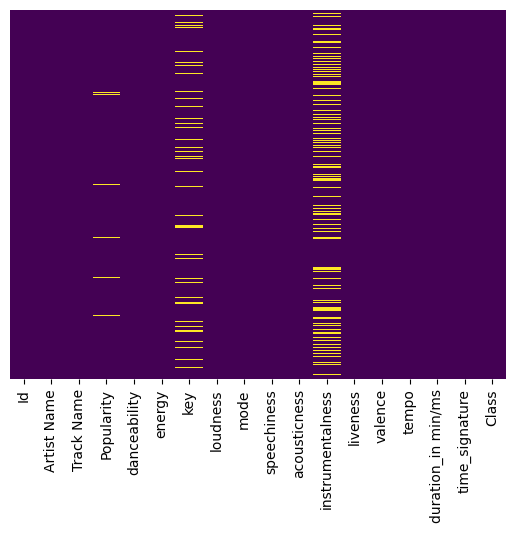

In [9]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

see the relation between the columns

In [10]:
train_df.corr()['Class'].sort_values(ascending = False)

/tmp/ipykernel_33/4107949684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['Class'].sort_values(ascending = False)


Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
Id                    0.002703
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

see the relation between the columns and class

# **EDA and data cleaning**

In [ ]:
sns.pairplot(train_df)

plot the columns with each other

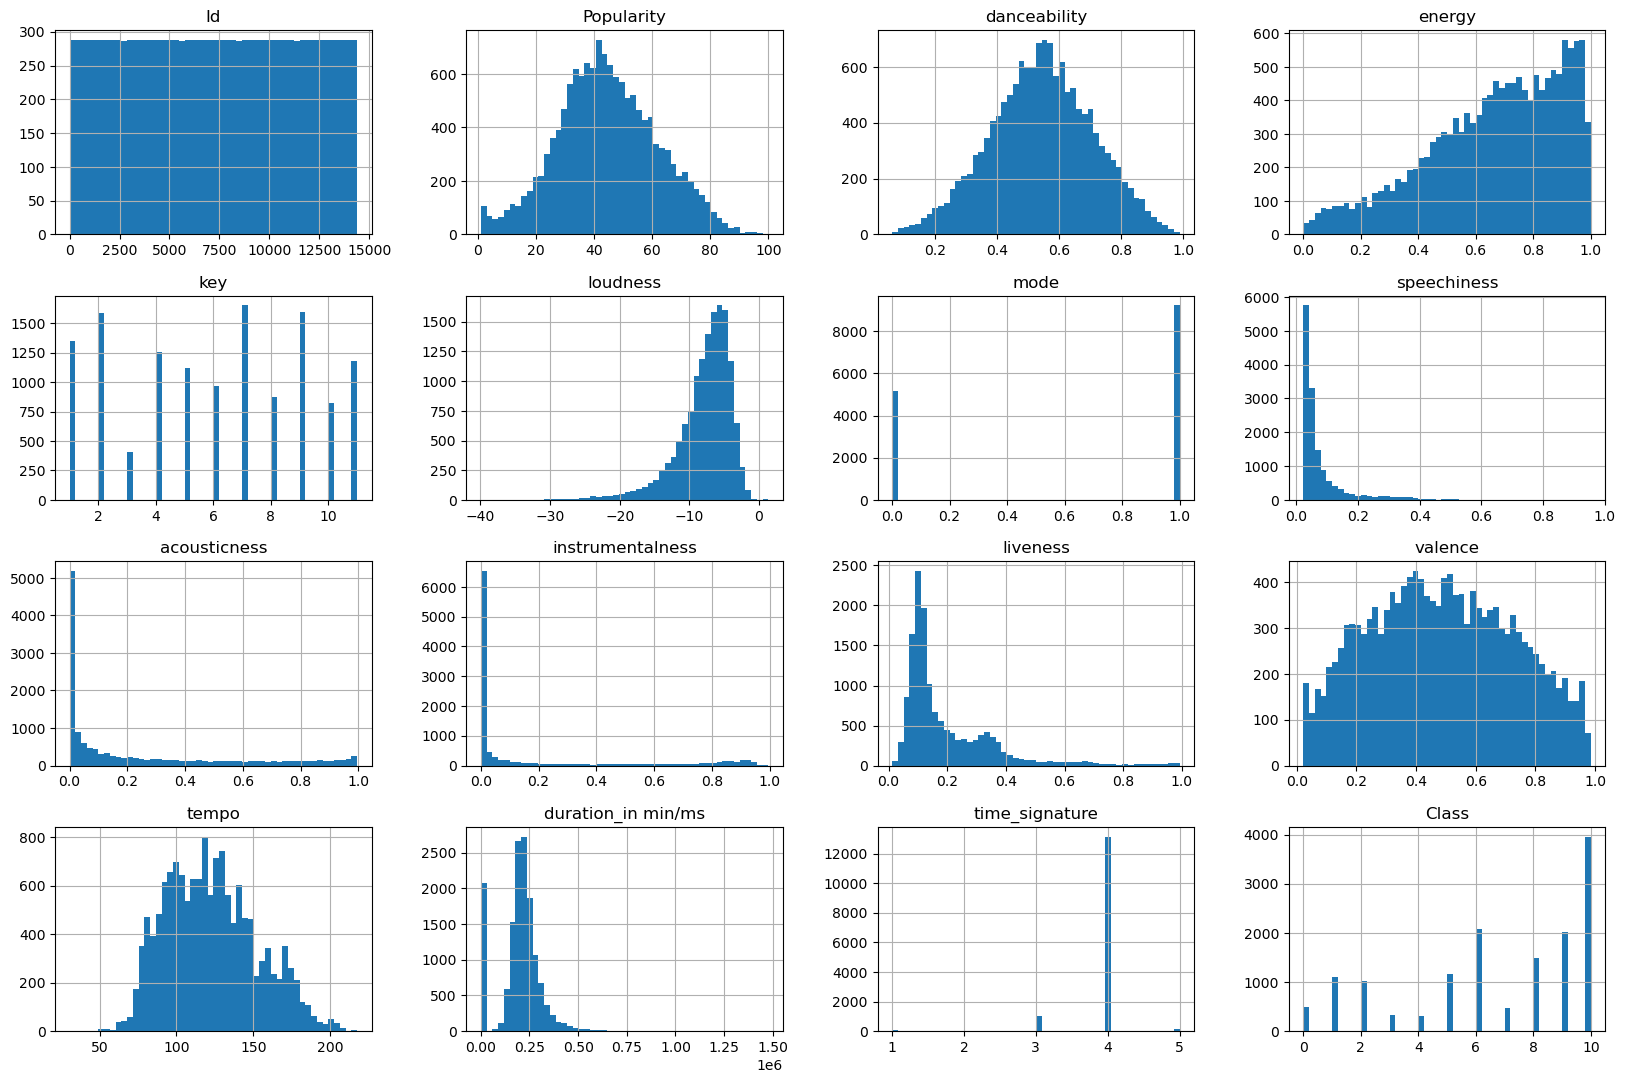

In [11]:
train_df.hist(bins=50, figsize=(20, 13))
plt.show()

In [ ]:
train_df['loudness']=np.cbrt(train_df['loudness'])
train_df['speechiness']=np.reciprocal(train_df['speechiness'])
train_df['acousticness']=np.cbrt(train_df['acousticness'])
train_df['instrumentalness']=np.log(train_df['instrumentalness'])
train_df['liveness']=np.log(train_df['liveness'])
train_df['duration_in min/ms']=np.sqrt(train_df['duration_in min/ms'])
train_df['tempo']=np.cbrt(train_df['tempo'])

The loudness , speechiness , acousticness , instrumentalness and  liveness are skewed .


In [ ]:
train_df['Popularity'].fillna(train_df['Popularity'].median (),inplace=True)
train_df['key'].fillna(train_df['key'].median (),inplace=True)
train_df['instrumentalness'].fillna(train_df['instrumentalness'].median (),inplace=True)

In [ ]:
# train_df.drop_duplicates(inplace=True)

In [ ]:
# condition = train_df['duration_in min/ms'] < 30 
# # If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
# train_df.loc[condition,'duration_in min/ms'] = train_df.loc[condition,'duration_in min/ms']*60000

In [ ]:
# # Calculate the lower and upper quartiles (25th and 75th percentiles)
# Q1 = np.percentile(train_df['liveness'], 25)
# Q3 = np.percentile(train_df['liveness'], 75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Set the lower and upper limits for outliers
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

# # Replace outliers with the nearest limit value
# train_df['liveness'] = np.where(train_df['liveness'] < lower_limit, lower_limit, train_df['liveness'])
# train_df['liveness'] = np.where(train_df['liveness'] > upper_limit, upper_limit, train_df['liveness'])

In [ ]:
X=train_df.drop(columns=['Id','Class'])
Y=train_df[['Class']]

In [ ]:
X.info()

In [ ]:
Y

# **Tune the models**

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# pipeline_rf = Pipeline([("scalar1", StandardScaler()),
#                      ("rf", RandomForestClassifier(random_state=42))])
# pipeline_sg = Pipeline([("scalar2", StandardScaler()),
#                      ("sg", OneVsOneClassifier(SGDClassifier (random_state=42)))])
# pipeline_lg = Pipeline([("scalar3", StandardScaler()),
#                      ("lg", LogisticRegression(random_state=42))])
# pipeline_kn = Pipeline([("scalar5", StandardScaler()),
#                      ("kn", KNeighborsClassifier())])
# pipeline_svc = Pipeline([("scalar6", StandardScaler()),
#                      ("svc", SVC(random_state=42))])


# pipelines = [pipeline_rf, pipeline_sg,pipeline_lg,pipeline_kn,pipeline_svc,]

# # # Dictionary of pipelines and model types for ease of reference
# pipeline_dict = {0: "RandomForestClassifier",1: "SGDClassifier",2: "LogisticRegression",3:"KNeighborsClassifier",4:"SVC"}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# modelRF = RandomForestClassifier(random_state=42)
# # Define the search space of hyperparameters
# param_dist = {
#     'n_estimators': randint(10, 400),
#     'max_depth': randint(1, 10),
#     'min_samples_split':randint(2, 20),
#     'min_samples_leaf': randint(1, 15),
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     modelRF, 
#     param_distributions=param_dist,
#     n_iter=50,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# modelRF=random_search.best_estimator_

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# from scipy.stats import reciprocal

# modelovo = SGDClassifier( random_state=42)
# # Define the search space of hyperparameters
# param_dist = {
#     'alpha': reciprocal(0.0001, 0.1),
#     'loss': ['hinge', 'log', 'modified_huber'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'learning_rate': ['constant', 'optimal', 'invscaling'],
#     'eta0': reciprocal(0.0001, 0.1),
#     'max_iter': [100, 200, 500]
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     modelovo,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# modelovo=OneVsOneClassifier(random_search.best_estimator_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from scipy.stats import uniform
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# modelLR = LogisticRegression(random_state=42)

# # Define the search space of hyperparameters
# param_dist = {
#     'C': uniform(loc=0, scale=10),
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [100, 200, 500]
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     modelLR,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# modelLR=random_search.best_estimator_

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# modelKNN = KNeighborsClassifier()

# # Define the search space of hyperparameters
# param_dist = {
#     'n_neighbors': randint(1, 20),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     modelKNN,
#     param_distributions=param_dist,
#     n_iter=0,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# modelKNN=random_search.best_estimator_

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# modelSVC = SVC(random_state=42)

# # Define the search space of hyperparameters
# param_dist = {
#     'C': uniform(loc=0, scale=10),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
    
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     modelSVC,
#     param_distributions=param_dist,
#     n_iter=5,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)
# modelSVC=random_search.best_estimator_

In [ ]:
# modelSVC = SVC(random_state=42,gamma="scale",kernel="linear",C=7.319939418)
# modelKNN.fit(X,Y)
# modelLR.fit(X,Y)
# modelovo.fit(X,Y)
# modelRF.fit(X,Y)


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

# # Create the AdaBoost classifier
# ada = AdaBoostClassifier(base_estimator=modelRF)

# # Define the search space of hyperparameters
# param_dist = {
#     'n_estimators': randint(10, 400),
#     'learning_rate': [0.01, 0.1, 1.0],
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     ada,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

# base_estimators = [
#     ('knn', modelKNN),
#     ('lr', modelLR),
#     ('rf', modelRF),
#     ('sgd', modelovo),

# ]

# votingClassifier = VotingClassifier(estimators=base_estimators,voting='hard')
# votingClassifier.fit(X,Y)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from xgboost import XGBClassifier
# model = XGBClassifier()

# # Define the search space of hyperparameters
# param_dist = {
#     'n_estimators': randint(10, 400),
#     'max_depth': randint(1, 10),
# }

# # Create the RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     model,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='accuracy',  # Evaluation metric
#     random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X, Y)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)




In [ ]:
# from sklearn.pipeline import Pipeline
# pipelineFINAL = Pipeline([("scalar", StandardScaler()),
#                      ("xb", random_search.best_estimator_)])
# pipelineFINAL.fit(X,Y)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from scipy.stats import uniform, randint
param_dist = {
    'iterations': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'depth': randint(3, 10),
    # Add other hyperparameters you want to tune here
}

catboost = CatBoostClassifier(loss_function='MultiClass', cat_features=['Artist Name', 'Track Name'])
random_search = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=15, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train,eval_set=(X_test, y_test))

In [ ]:
Predicted=model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Predicted,average='weighted')

In [ ]:
X_test=test_df.drop(columns=['Id'])

In [ ]:
# condition = X_test['duration_in min/ms'] < 30 
# # If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
# X_test.loc[condition,'duration_in min/ms'] = X_test.loc[condition,'duration_in min/ms']*60000

In [ ]:
X_test['loudness']=np.cbrt(X_test['loudness'])
X_test['speechiness']=np.reciprocal(X_test['speechiness'])
X_test['acousticness']=np.cbrt(X_test['acousticness'])
X_test['instrumentalness']=np.log(X_test['instrumentalness'])
X_test['liveness']=np.log(X_test['liveness'])
X_test['duration_in min/ms']=np.sqrt(X_test['duration_in min/ms'])
X_test['tempo']=np.cbrt(X_test['tempo'])

In [ ]:
popm=X_test['Popularity'].median()
keym=X_test['key'].median()
insm=X_test['instrumentalness'].median()


X_test['Popularity']=X_test['Popularity'].replace(np.nan,popm)
X_test['key']=X_test['key'].replace(np.nan,keym)
X_test['instrumentalness']=X_test['instrumentalness'].replace(np.nan,insm)

In [ ]:
# X_test['energy_range'] = X_test['energy'].max() - X_test['energy'].min()
# X_test['energy_loudness_ratio'] = X_test['energy'] / X_test['loudness']
# X_test['duration_range'] = X_test['duration_in min/ms'].max() - X_test['duration_in min/ms'].min()
# # X_test['popularity_bins'] = pd.cut(X_test['Popularity'], bins=5, labels=False)
# X_test['loudness_range'] = X_test['loudness'].max() - X_test['loudness'].min()
# X_test['is_acoustic'] = X_test['acousticness'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
from sklearn.model_selection import cross_val_predict
predictions =pipelineFINAL.predict(X_test)
y_train_pred = cross_val_predict(pipelineFINAL, X, Y, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
df=test_df[['Id']]
h=pd.DataFrame(predictions)
dfres=pd.merge(df,h,left_index=True,right_index=True)

In [ ]:
dfres=dfres[['Id',0]]
dfres.rename(columns={0:'Class'},inplace=True)

In [ ]:
dfres.head(40)

In [ ]:
dfres.to_csv('resultsfinal2.csv',index=False)